# Importing libraries

In [ ]:
# importing libraries

import numpy as np 
import matplotlib.pyplot as plt
from astropy.io import ascii
from scipy.optimize import curve_fit
%matplotlib inline

# Loading Data

In [ ]:
# Loading the radial velocity data from 55cnc.txt

data = ascii.read('55cnc.txt')

#displaying the first 5 rows (TESTING)

data[:5]

HJD,Radial_Velocity,Radial_Velocity_Uncertainty
days,m / s,m / s
float64,float64,float64
2449676.0632,131.910003662,4.8400002
2449767.77441,22.6000003815,2.5699999
2449768.83203,-5.48999977112,2.6800001
2449793.79785,107.309997559,1.52
2450056.98828,116.669998169,1.6199999


# Extracting Columns

In [ ]:
# extracting data into variables time, rv, and uncertainty

time = data['HJD']
rv = data['Radial_Velocity']
uncertainty = data['Radial_Velocity_Uncertainty']

# Plotting the data

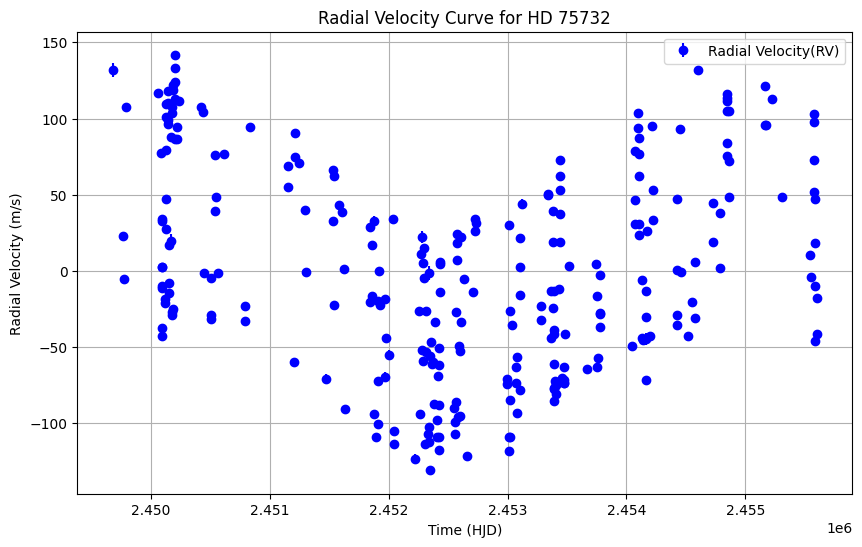

In [ ]:
# Creating plot

plt.figure(figsize=(10,6))

# plotting the RV with time and using errorbars for uncertainty

plt.errorbar(time,rv,yerr=uncertainty,fmt='o', color='blue', label='Radial Velocity(RV)')

# Adding labels and a title

plt.xlabel('Time (HJD)')
plt.ylabel('Radial Velocity (m/s)')
plt.title('Radial Velocity Curve for HD 75732')

# adding grid and legend 

plt.grid(True)
plt.legend()


#Save plot as a pdf
plt.savefig('radial_velocity_curve.pdf', format='pdf')


#show plot
plt.show()


In [ ]:
def sine_function(x, A, B, C, D):
    return A * np.sin(B * x + C) + D

initial = [140,0.000954,2.4525,0]

params, cov = curve_fit(sine_function, time, rv, sigma=uncertainty, absolute_sigma=True,p0=initial)
A_fit, B_fit, C_fit, D_fit = params
print(f"Fitted parameters: A={A_fit}, B={B_fit}, C={C_fit}, D={D_fit}")
# Generate y values using the fitted parameters
y_fit = sine_function(time, A_fit, B_fit, C_fit, D_fit)

plt.figure(figsize=(10,6))

plt.errorbar(time,rv,yerr=uncertainty,fmt='o', color='blue', label='Radial Velocity(RV)')
plt.plot(time, y_fit, label='Fitted Curve', color='red')

plt.xlabel('Time (HJD)')
plt.ylabel('Radial Velocity (m/s)')
plt.title('Radial Velocity Curve for HD 75732')
plt.grid(True)
plt.legend()

plt.title('Sine Curve Fitting')


#Save plot as a pdf
plt.savefig('sine_curve_fitting.pdf', format='pdf')
plt.show()